In [2]:
pip install vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from vega_datasets import data

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
df = data.cars()

In [5]:
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [6]:
df.shape

(406, 9)

In [8]:
df.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [9]:
df.isnull().sum()

Name                0
Miles_per_Gallon    8
Cylinders           0
Displacement        0
Horsepower          6
Weight_in_lbs       0
Acceleration        0
Year                0
Origin              0
dtype: int64

In [10]:
df.dropna(subset=['Horsepower', 'Miles_per_Gallon'], inplace=True)

<AxesSubplot:>

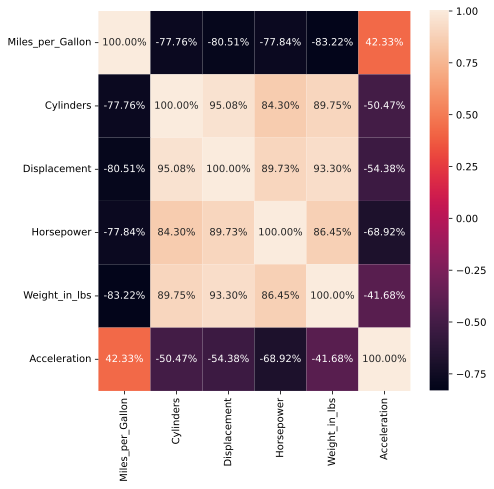

In [13]:
corr = df.corr()
import seaborn as sns
plt.figure(figsize = (7,7))
sns.heatmap(corr,annot = True,fmt='.2%')

In [19]:
x = df['Horsepower'].to_numpy().reshape(-1, 1)
y = df['Miles_per_Gallon'].to_numpy().reshape(-1, 1)

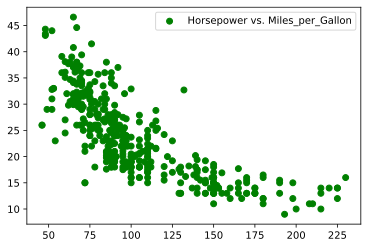

In [21]:
plt.scatter(x, y, c='g', label='Horsepower vs. Miles_per_Gallon')
plt.legend()
plt.show()

In [23]:
# Enable interactive plot
%matplotlib notebook
%matplotlib notebook

In [24]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>


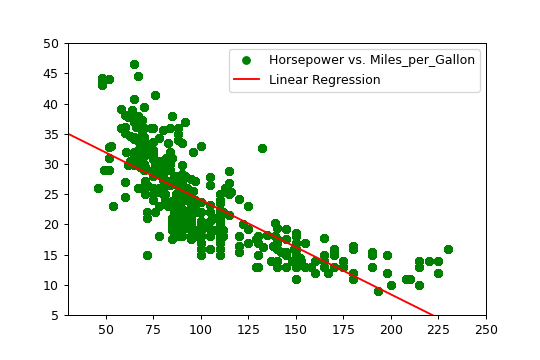

In [28]:
x_data = []
y_data = []

fig, ax = plt.subplots() 
ax.set_xlim(30, 250)
ax.set_ylim(5, 50)
# Plotting 
scatter, = ax.plot([], [], 'go', label='Horsepower vs. Miles_per_Gallon')
line, = ax.plot([], [], 'r', label='Linear Regression')
ax.legend()

reg = LinearRegression()

def animate(frame_num):
    x_data.append(x[frame_num])
    y_data.append(y[frame_num])
    x_train = np.array(x_data).reshape(-1, 1)
    y_train = np.array(y_data).reshape(-1, 1)
    reg.fit(x_train, y_train)
    scatter.set_data((x_data, y_data))
    line.set_data((list(range(250)), reg.predict(np.array([entry for entry in range(250)]).reshape(-1, 1))))

anim = FuncAnimation(fig, animate, frames=len(x), interval=20)
plt.show()